In [18]:
import tensorflow as tf
def generate_fgsm(image, model, epsilon):
    # Ensure the image has the correct shape (e.g., [1, 32, 32, 3] for CIFAR-10)
    image = tf.convert_to_tensor(image)
    image = tf.reshape(image, (1, *image.shape))

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        target_class = tf.argmax(prediction[0])
        loss = tf.keras.losses.sparse_categorical_crossentropy(target_class, prediction)

    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)
    perturbed_image = image + epsilon * signed_grad
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 1)  # Ensure pixel values are in [0, 1] range
    
    return perturbed_image.numpy()[0]

# Test on image from numbers dataset

1/1 [==============================] - 0s 83ms/step


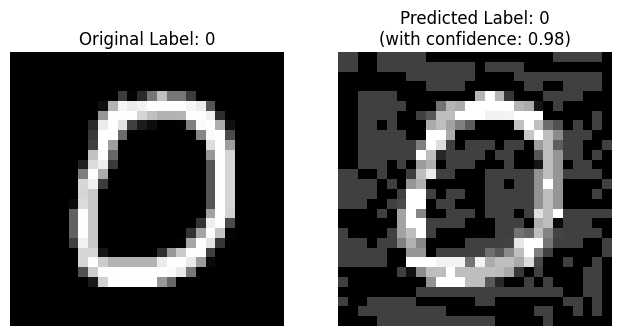

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the FCN model you created earlier
fcn_model = tf.keras.models.load_model("../Models/Mnist/mnist_model_2LFCN.karas")

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0  # Preprocess the data

# Select a random image from the test dataset
random_index = 10 #np.random.randint(0, len(test_images))
input_image = test_images[random_index]
original_label = test_labels[random_index]

# Define an epsilon value for the FGSM attack
epsilon = 0.25

# Use the generate_fgsm function to generate a perturbed image
perturbed_image = generate_fgsm(input_image, fcn_model, epsilon)

#perturbed_image = generate_targeted_fgsm(input_image, fcn_model, epsilon, 5)

# Calculate the difference between the original and perturbed images
difference_image = input_image - perturbed_image

# Perform inference on the perturbed image
perturbed_image_reshaped = perturbed_image.reshape(1, 28, 28)  # Reshape to match the model's input shape
predictions = fcn_model.predict(perturbed_image_reshaped)

# Get the predicted class label
predicted_label = np.argmax(predictions)
confidence = np.max(predictions)

# Display the original image, perturbed image, and the difference
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(input_image, cmap='gray')
plt.title(f'Original Label: {original_label}')
plt.axis('off')

plt.subplot(132)
plt.imshow(perturbed_image_reshaped[0], cmap='gray')
plt.title(f'Predicted Label: {predicted_label}\n(with confidence: {confidence:.2f})')
plt.axis('off')

plt.show()

1/1 [==============================] - 0s 24ms/step


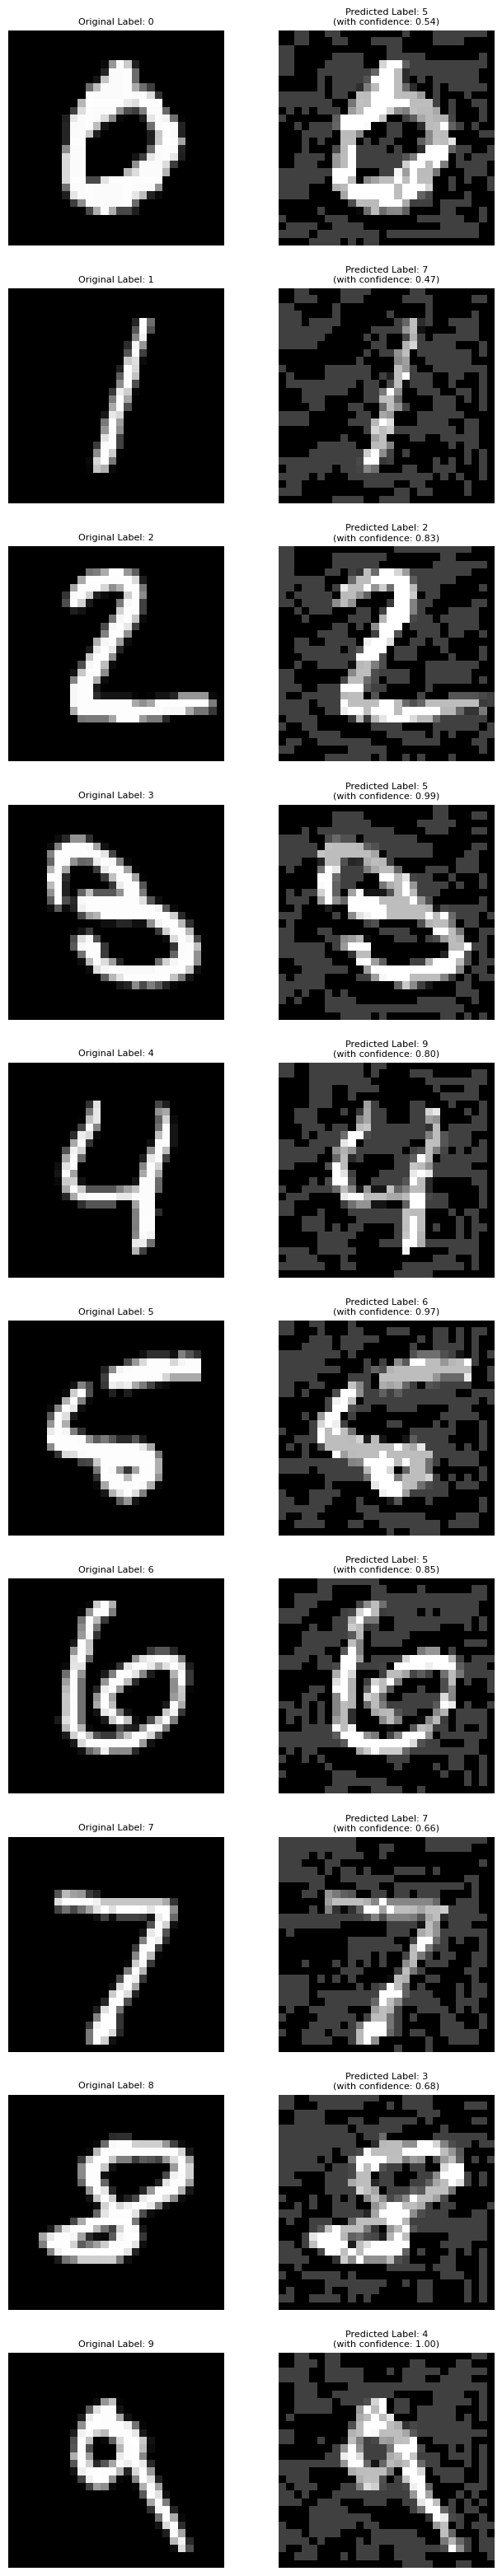

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the FCN model you created earlier
fcn_model = tf.keras.models.load_model("../Models/Mnist/mnist_model_2LFCN.karas")

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0  # Preprocess the data

# Select one sample from each class in the test dataset
indices = []
for i in range(10):  # Assuming there are 10 classes
    indices.append(np.where(test_labels == i)[0][0])

# Define an epsilon value for the FGSM attack
epsilon = 0.25

plt.figure(figsize=(12, 40))

for i, index in enumerate(indices):
    input_image = test_images[index]
    original_label = test_labels[index]

    # Use the generate_fgsm function to generate a perturbed image
    perturbed_image = generate_fgsm(input_image, fcn_model, epsilon)

    # Calculate the difference between the original and perturbed images
    difference_image = input_image - perturbed_image

    # Perform inference on the perturbed image
    perturbed_image_reshaped = perturbed_image.reshape(1, 28, 28)  # Reshape to match the model's input shape
    predictions = fcn_model.predict(perturbed_image_reshaped)

    # Get the predicted class label
    predicted_label = np.argmax(predictions)
    confidence = np.max(predictions)

    # Display the original image, perturbed image, and the difference
    plt.subplot(10, 3, i*3+1)
    plt.imshow(input_image, cmap='gray')
    plt.title(f'Original Label: {original_label}',fontsize=8)
    plt.axis('off')

    plt.subplot(10, 3, i*3+2)
    plt.imshow(perturbed_image_reshaped[0], cmap='gray')
    plt.title(f'Predicted Label: {predicted_label}\n(with confidence: {confidence:.2f})',fontsize=8)
    plt.axis('off')

plt.show()


1/1 [==============================] - 0s 27ms/step


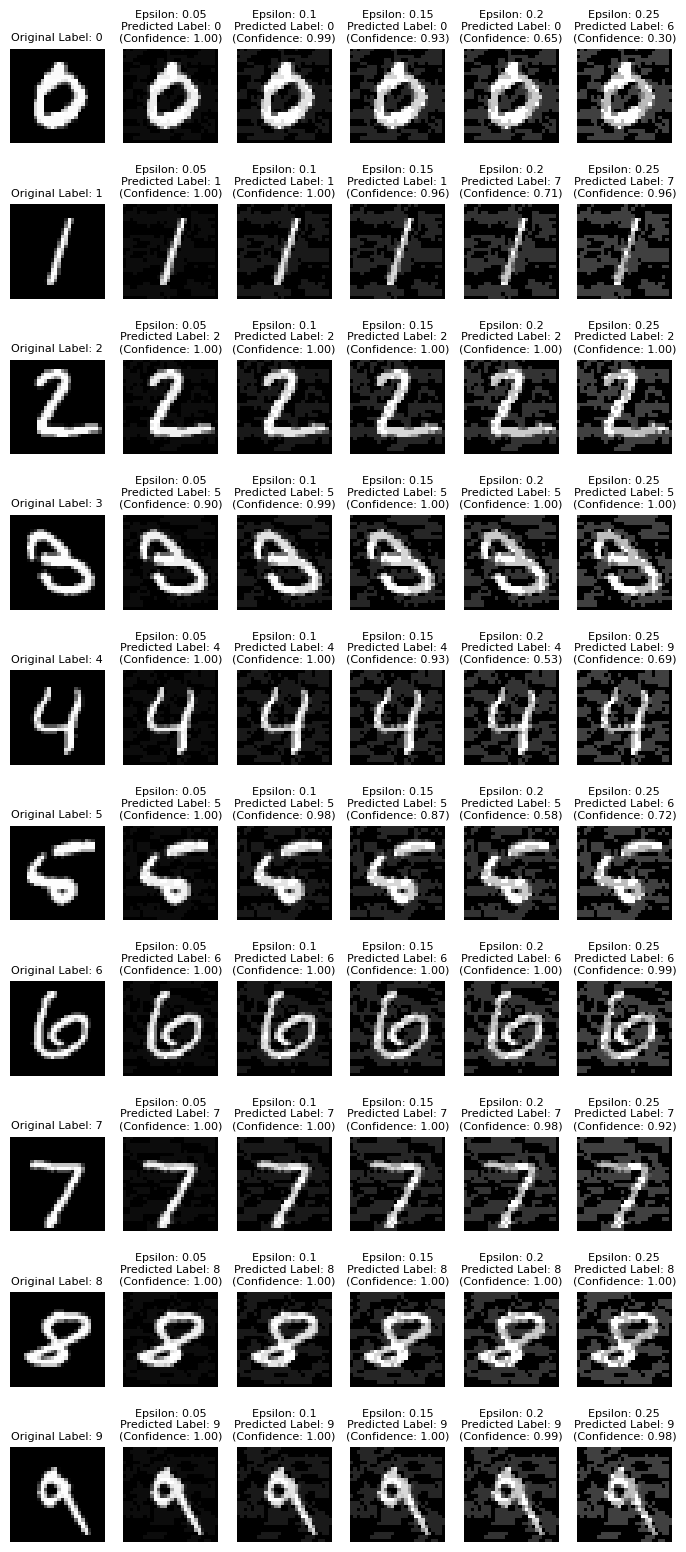

In [217]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45)
tf.random.set_seed(45)

# Load the FCN model you created earlier
leNet_model = tf.keras.models.load_model("../Models/Mnist/mnist_model_2LFCN.karas")
fcn_model = tf.keras.models.load_model("../Models/Mnist/mnist_model_LENET.karas")

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0  # Preprocess the data

# Select one sample from each class in the test dataset
indices = []
for i in range(10):  # Assuming there are 10 classes
    indices.append(np.where(test_labels == i)[0][0])

# Define a list of epsilon values for the FGSM attack
epsilons = [0, 0.05, .1, .15, .2, .25]

plt.figure(figsize=(10, 20))

for i, index in enumerate(indices):
    input_image = test_images[index]
    original_label = test_labels[index]

    for j, epsilon in enumerate(epsilons):
        # Use the generate_fgsm function to generate a perturbed image
        perturbed_image = generate_fgsm(input_image, fcn_model, epsilon)

        # Perform inference on the perturbed image
        perturbed_image_reshaped = perturbed_image.reshape(1, 28, 28)  # Reshape to match the model's input shape
        predictions = leNet_model.predict(perturbed_image_reshaped)

        # Get the predicted class label
        predicted_label = np.argmax(predictions)
        confidence = np.max(predictions)

        # Display the original image and perturbed images
        plt.subplot(10, len(epsilons)+1, i*(len(epsilons)+1)+j+1)
        if j == 0:
            plt.imshow(input_image, cmap='gray')
            plt.title(f'Original Label: {original_label}',fontsize=8)
        else:
            plt.imshow(perturbed_image_reshaped[0], cmap='gray')
            plt.title(f'Epsilon: {epsilon}\nPredicted Label: {predicted_label}\n(Confidence: {confidence:.2f})',fontsize=8)
        plt.axis('off')

# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.1)

plt.show()


In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the FCN model
fcn_model = tf.keras.models.load_model("../Models/Mnist/mnist_model_2LFCN.karas")

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0  # Preprocess the training data
test_images = test_images / 255.0  # Preprocess the test data

# Define epsilon for the FGSM attack
epsilon = 0.25

# Create a new dataset with perturbed training images
perturbed_train_images = []


# Create a new dataset with perturbed test images
perturbed_test_images = []

print("\nGenerating perturbed test images:")
for i, image in enumerate(test_images):
    perturbed_image = generate_fgsm(image, fcn_model, epsilon)
    perturbed_test_images.append(perturbed_image)
    
    # Print progress
    if (i + 1) % 1000 == 0 or (i + 1) == len(test_images):
        print(f"Processed {i + 1}/{len(test_images)} images")

perturbed_test_images = np.array(perturbed_test_images)

# Optionally, you can save the perturbed test images and labels to a new dataset
np.savez_compressed('perturbed_mnist_test.npz', images=perturbed_test_images, labels=test_labels)


Generating perturbed test images:
Processed 1000/10000 images
Processed 2000/10000 images


KeyboardInterrupt: 

In [128]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the fully connected model
fully_connected_model = tf.keras.models.load_model("../Models/MNIST/mnist_model_2LFCN.karas")
# Load the MNIST test dataset
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0

# Evaluate the accuracy of the fully connected model with perturbed images
epsilon = 0.15  # You can adjust the epsilon value
perturbed_images = np.array([generate_fgsm(image, fully_connected_model, epsilon) for image in test_images])

# Evaluate the accuracy of the fully connected model
fully_connected_loss, fully_connected_accuracy = fully_connected_model.evaluate(perturbed_images, test_labels)
print(f"Fully Connected Model - Test Accuracy: {fully_connected_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 1.6866 - accuracy: 0.6326
Fully Connected Model - Test Accuracy: 63.26%


LENET

1/1 [==============================] - 0s 64ms/step


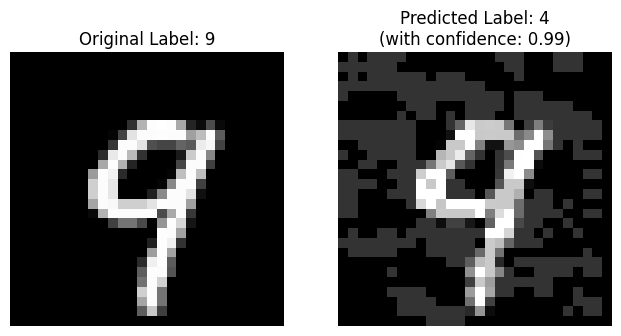

In [171]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the FCN model you created earlier
fcn_model = tf.keras.models.load_model("../Models/Mnist/mnist_model_LENET.karas")

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0  # Preprocess the data

# Select a random image from the test dataset
random_index = 12 #np.random.randint(0, len(test_images))
input_image = test_images[random_index]
original_label = test_labels[random_index]

# Define an epsilon value for the FGSM attack
epsilon = 0.2

# Use the generate_fgsm function to generate a perturbed image
perturbed_image = generate_fgsm(input_image, fcn_model, epsilon)
#perturbed_image = generate_targeted_fgsm(input_image, fcn_model, epsilon, 5)

# Calculate the difference between the original and perturbed images
difference_image = input_image - perturbed_image

# Perform inference on the perturbed image
perturbed_image_reshaped = perturbed_image.reshape(1, 28, 28)  # Reshape to match the model's input shape
predictions = fcn_model.predict(perturbed_image_reshaped)

# Get the predicted class label
predicted_label = np.argmax(predictions)
confidence = np.max(predictions)

# Display the original image, perturbed image, and the difference
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(input_image, cmap='gray')
plt.title(f'Original Label: {original_label}')
plt.axis('off')

plt.subplot(132)
plt.imshow(perturbed_image, cmap='gray')
plt.title(f'Predicted Label: {predicted_label}\n(with confidence: {confidence:.2f})')
plt.axis('off')

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the LNET
fully_connected_model = tf.keras.models.load_model("../Models/MNIST/mnist_model_LENET.karas")
# Load the MNIST test dataset
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0

# Evaluate the accuracy of the LNET with perturbed images
epsilon = 0.15  # You can adjust the epsilon value
perturbed_images = np.array([generate_fgsm(image, fully_connected_model, epsilon) for image in test_images])

# Evaluate the accuracy of the fully connected model
fully_connected_loss, fully_connected_accuracy = fully_connected_model.evaluate(perturbed_images, test_labels)
print(f"LNET - Test Accuracy: {fully_connected_accuracy * 100:.2f}%")